# Assignment #2


## We will use IRIS dataset. https://archive.ics.uci.edu/ml/datasets/Iris
## Below is the process.
### a. Divide the dataset as development and test. Because kNN does not require  training you don’t have a train dataset. Make sure randomly divide the dataset


In [235]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from math import sqrt
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

In [236]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

header_list = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv(url,names=header_list)

dataset




,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [237]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

X_dev, X_test, y_dev, y_test = train_test_split(X, y, train_size=0.8)


In [238]:
nomalize_data_x=X_dev.copy()
nomalize_data_y=y_dev.copy()

len(nomalize_data_x[0])

for i in range(len(nomalize_data_x[0])):
	mx=max(nomalize_data_x[:,i])
	mi=min(nomalize_data_x[:,i])
	nomalize_data_x[:,i]=(nomalize_data_x[:,i]-mi)/(mx-mi)


### b. implement kNN using the following hyperparameters
### number of neighbor K
#### * 1,3,5,7
### distance metric
#### * euclidean distance
#### * normalized euclidean distance
#### * cosine similarity

In [239]:
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [240]:
def cosine_similarity_fuc(row1, row2):
	aa = row1.reshape(1,4)
	ba = row2.reshape(1,4)
	cos_lib = cosine_similarity(aa, ba)
	return 1-cos_lib

In [241]:
def get_neighbors(x_dev, test_row, num_neighbors,y_dev,distance_metric):
	distances = list()
	neighbors = list()
	mx=0
	mi=10
	for (x_dev_row , y_dev_row) in zip(x_dev,y_dev):
		if distance_metric =='euclidean' or 'normalized':
			dist = euclidean_distance(x_dev_row, test_row)
			distances.append((x_dev_row, dist,y_dev_row))
		if distance_metric =='cosine':
			dist = cosine_similarity_fuc(x_dev_row, test_row)
			distances.append((x_dev_row, dist,y_dev_row))

        
        
        
	distances.sort(key=lambda tup: tup[1])
	num_neighbors+=1
	for i in range(num_neighbors):
		neighbors.append(distances[i])
	neighbors.pop(0)
	return neighbors


In [242]:
def predict_classification(dev_row, test_row, num_neighbors,y_dev,distance_metric):
	class_list=list()
	neighbors = get_neighbors(dev_row, test_row, num_neighbors,y_dev,distance_metric)
	for row in neighbors:
		class_list.append(row[2])
	return class_list

### C. Using the development dataset,
#### Calculate accuracy by iterating all of the development data point



In [243]:
precict_class_1=list()
precict_class_3=list()
precict_class_5=list()
precict_class_7=list()
diff_K=np.array
num=[1,3,5,7]
for i in num:
	for row in X_dev:
		predict=predict_classification(X_dev,row,i,y_dev,'euclidean')
		a = Counter(predict)
		if i ==1:   
			precict_class_1.append(a.most_common(1)[0][0])
		elif i ==3:
			precict_class_3.append(a.most_common(1)[0][0])
		elif i ==5:
			precict_class_5.append(a.most_common(1)[0][0])
		else:
			precict_class_7.append(a.most_common(1)[0][0])
diff_K=[precict_class_1,precict_class_3,precict_class_5,precict_class_7]


In [244]:
correct =0
result_1=[]
list_num=[0,1,2,3]
for list_nums in list_num:
	correct =0
	for i in range(len(diff_K[list_nums])):
		if diff_K[list_nums][i]==y_dev[i]:
			correct+=1
	result_1.append(correct/len(diff_K[0])*100)
	correct=0
print(result_1)

[94.16666666666667, 96.66666666666667, 96.66666666666667, 98.33333333333333]


In [245]:
precict_class_1=list()
precict_class_3=list()
precict_class_5=list()
precict_class_7=list()
diff_K=np.array
num=[1,3,5,7]
for i in num:
	for row in X_dev:
		predict=predict_classification(X_dev,row,i,y_dev,'cosine')
		a = Counter(predict)
		if i ==1:   
			precict_class_1.append(a.most_common(1)[0][0])
		elif i ==3:
			precict_class_3.append(a.most_common(1)[0][0])
		elif i ==5:
			precict_class_5.append(a.most_common(1)[0][0])
		else:
			precict_class_7.append(a.most_common(1)[0][0])
diff_K=[precict_class_1,precict_class_3,precict_class_5,precict_class_7]
    
    


In [246]:
correct =0
result_2=[]
list_num=[0,1,2,3]
for list_num in list_num:
	correct =0
	for i in range(len(diff_K[list_num])):
		if diff_K[list_num][i]==y_dev[i]:
			correct+=1
	result_2.append(correct/len(diff_K[0])*100)
	correct=0
print(result_2)

[100.0, 98.33333333333333, 99.16666666666667, 98.33333333333333]


In [247]:
precict_class_1=list()
precict_class_3=list()
precict_class_5=list()
precict_class_7=list()
diff_K=np.array
num=[1,3,5,7]
for i in num:
	for row in nomalize_data_x:
		predict=predict_classification(nomalize_data_x,row,i,nomalize_data_y,'normalized')
		a = Counter(predict)
		if i ==1:   
			precict_class_1.append(a.most_common(1)[0][0])
		elif i ==3:
			precict_class_3.append(a.most_common(1)[0][0])
		elif i ==5:
			precict_class_5.append(a.most_common(1)[0][0])
		else:
			precict_class_7.append(a.most_common(1)[0][0])
diff_K=[precict_class_1,precict_class_3,precict_class_5,precict_class_7]


In [248]:
correct =0
result_3=[]
list_num=[0,1,2,3]
for list_num in list_num:
	correct =0
	for i in range(len(diff_K[list_num])):
		if diff_K[list_num][i]==y_dev[i]:
			correct+=1
	result_3.append(correct/len(diff_K[0])*100)
	correct=0
print(result_3)

[95.83333333333334, 95.0, 97.5, 96.66666666666667]



### Find optimal hyperparameters
#### *Draw bar charts for accuracy

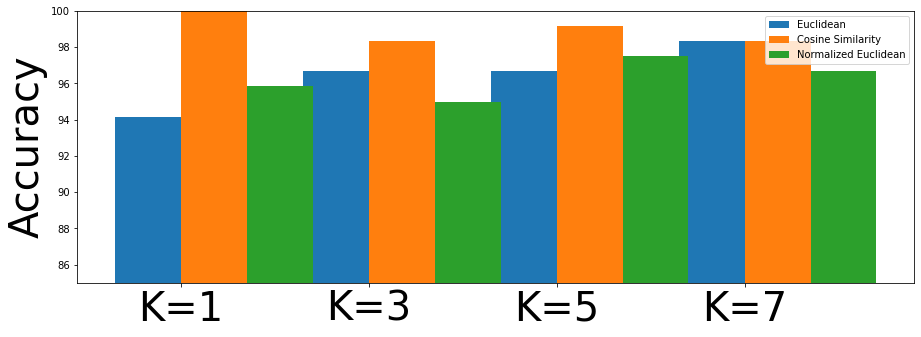

In [249]:
N = 4
men_means = (20, 35, 30, 35)
women_means = (25, 32, 34, 20)

ind = np.arange(N) 
width = 0.35       
fig = plt.figure(figsize=(15,5),facecolor='w')
#plt.rcParams["figure.figsize"] = (20,10)

plt.bar(ind, result_1, width, label='Euclidean')
plt.bar(ind + width, result_2, width,
    label='Cosine Similarity')
plt.bar(ind + width+ width, result_3, width,
    label='Normalized Euclidean')


plt.ylabel('Accuracy', fontsize=40)
plt.ylim((85,100))

plt.xticks(ind + width / 2, ('K=1', 'K=3', 'K=5', 'K=7') ,fontsize=40)
plt.legend(loc='best' ,fontsize=10)
plt.show()

### Use Cosine Similarity Since it gives the highest accuracy

In [250]:
precict_class_1=list()
precict_class_3=list()
precict_class_5=list()
precict_class_7=list()
diff_K=np.array
num=[1,3,5,7]
for i in num:
	for row in X_test:
		predict=predict_classification(X_test,row,i,y_test,'cosine')
		a = Counter(predict)
		if i ==1:   
			precict_class_1.append(a.most_common(1)[0][0])
		elif i ==3:
			precict_class_3.append(a.most_common(1)[0][0])
		elif i ==5:
			precict_class_5.append(a.most_common(1)[0][0])
		else:
			precict_class_7.append(a.most_common(1)[0][0])
diff_K=[precict_class_1,precict_class_3,precict_class_5,precict_class_7]
    

In [251]:
correct =0
result_test=[]
list_num=[0,1,2,3]
for list_num in list_num:
	correct =0
	for i in range(len(diff_K[list_num])):
		if diff_K[list_num][i]==y_test[i]:
			correct+=1
	result_test.append(correct/len(diff_K[0])*100)
	correct=0
print(result_test)

[100.0, 96.66666666666667, 96.66666666666667, 96.66666666666667]


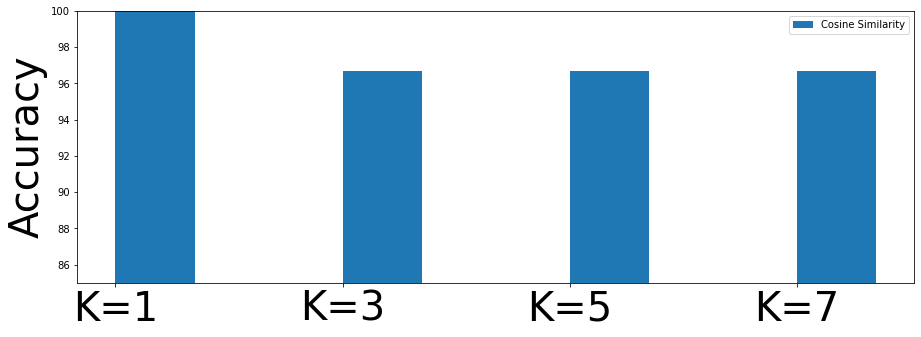

In [252]:
N = 4
men_means = (20, 35, 30, 35)
women_means = (25, 32, 34, 20)

ind = np.arange(N) 
width = 0.35       
fig = plt.figure(figsize=(15,5),facecolor='w')
#plt.rcParams["figure.figsize"] = (20,10)


plt.bar(ind + width, result_test, width,
    label='Cosine Similarity')


plt.ylabel('Accuracy', fontsize=40)
plt.ylim((85,100))

plt.xticks(ind + width / 2, ('K=1', 'K=3', 'K=5', 'K=7') ,fontsize=40)
plt.legend(loc='best' ,fontsize=10)
plt.show()

###  Cosine Similarity with K=1 and K=3 give the highest accuracy